In [55]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
from tqdm import tqdm
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [58]:
TESS = "/home/avinashchavan/Desktop/finalproject/data_store/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/home/avinashchavan/Desktop/finalproject/data_store/RAVDESS/audio_speech_actors_01-24/"
SAVEE = "/home/avinashchavan/Desktop/finalproject/data_store/SAVEE/ALL/"
CREMA = "/home/avinashchavan/Desktop/finalproject/data_store/AudioWAV/"
RAVSONG = "/home/avinashchavan/Desktop/finalproject/data_store/RAVDESS_song/"

# Run one example 
dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_17', 'Actor_19', 'Actor_21', 'Actor_09', 'Actor_02']

### CREMA Dataset

In [3]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [4]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
from tqdm import tqdm
for i in tqdm(dir_list): 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

100%|██████████| 7442/7442 [00:00<00:00, 305152.12it/s]


male_disgust      671
male_sad          671
male_happy        671
male_angry        671
male_fear         671
female_fear       600
female_happy      600
female_sad        600
female_angry      600
female_disgust    600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

### RAVDEES dataset

In [75]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in tqdm(dir_list):
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

100%|██████████| 24/24 [00:00<00:00, 2700.99it/s]


sad         192
angry       192
happy       192
calm        192
disgust     192
fear        192
surprise    192
neutral      96
Name: labels, dtype: int64

### TESS dataset

In [6]:
dir_list = os.listdir(TESS)
dir_list.sort()
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_surprise    400
female_happy       400
female_fear        400
female_sad         400
female_neutral     400
female_angry       400
female_disgust     400
Name: labels, dtype: int64

In [76]:
#RAV SONG
dir_list = os.listdir(RAVSONG)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAVSONG + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVSONG + i + '/' + f)

        
RAV_dfs = pd.DataFrame(emotion)
RAV_dfs = RAV_dfs.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_dfs = pd.concat([pd.DataFrame(gender),RAV_dfs],axis=1)
RAV_dfs.columns = ['gender','emotion']
RAV_dfs['labels'] = RAV_dfs.emotion
RAV_dfs['source'] = 'RAVDESS'  
RAV_dfs = pd.concat([RAV_dfs,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_dfs = RAV_dfs.drop(['gender', 'emotion'], axis=1)
RAV_dfs.labels.value_counts()

calm       184
sad        184
angry      184
happy      184
fear       184
neutral     92
Name: labels, dtype: int64

### SAVEE dataset

In [7]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_happy        60
male_angry        60
male_disgust      60
male_fear         60
male_surprise     60
Name: labels, dtype: int64

In [163]:
#df = pd.concat([ RAV_df, TESS_df, CREMA_df], axis = 0)
df = pd.concat([ RAV_df, RAV_dfs,RAV_df[:int(RAV_df.shape[0]/2)]], axis = 0)

print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

angry       472
calm        472
fear        472
sad         472
happy       472
disgust     288
surprise    288
neutral     236
Name: labels, dtype: int64


In [164]:
df

,labels,source,path
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
...,...,...,...
715,calm,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
716,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
717,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
718,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...


## BASELINE modelling

In [165]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

,labels,source,path
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...


In [166]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over # datasets 
df = pd.DataFrame(columns=['feature'])

counter=0
for path in tqdm(ref['path']):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=40).T,
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

print(len(df))
df.head()


100%|██████████| 3172/3172 [03:03<00:00, 17.29it/s]

3172


,feature
0,"[-453.6828, 102.18169, -17.33223, 15.077891, -..."
1,"[-677.1172, 87.63012, 3.9732516, 15.096436, 8...."
2,"[-591.8604, 90.644295, 0.46863782, 22.506477, ..."
3,"[-584.8962, 100.30739, -6.7034307, 17.183643, ..."
4,"[-560.8615, 92.91066, -1.0843737, 15.238631, -..."


In [167]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-453.682800,102.181686,-17.332230,15.077891,-3.144119,13.175822,-14.024340,...,-5.439161,-6.471412,-5.984719,-3.303055,-7.607924,-3.285888,0.026597,-2.393561,1.913962,1.769395
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-677.117188,87.630119,3.973252,15.096436,8.129905,16.422251,-5.018029,...,-0.382024,-4.446791,-1.332099,-0.281551,-1.376313,0.000013,-1.299730,-2.325293,-2.219566,-1.663283
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-591.860413,90.644295,0.468638,22.506477,6.942158,18.488306,-7.732348,...,-1.650141,-3.239360,-2.909358,-0.326658,-3.508025,-1.382740,-1.867330,-2.272516,-2.195575,-2.896178
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-584.896179,100.307388,-6.703431,17.183643,4.139813,15.646654,-11.627791,...,-2.903142,-3.679712,-5.593213,-1.709895,-3.457834,-1.784106,-2.758051,-4.062043,-3.558861,-3.107982
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-560.861511,92.910660,-1.084374,15.238631,-7.650074,19.007704,-13.566956,...,-2.517837,-4.961462,-2.115119,-0.894658,-1.417710,-0.112617,-1.404444,-1.333170,-0.295669,-2.889107


In [168]:
df=df.fillna(0)
print(df.shape)
df[:5]

(3172, 43)


,labels,source,path,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,happy,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-453.682800,102.181686,-17.332230,15.077891,-3.144119,13.175822,-14.024340,...,-5.439161,-6.471412,-5.984719,-3.303055,-7.607924,-3.285888,0.026597,-2.393561,1.913962,1.769395
1,neutral,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-677.117188,87.630119,3.973252,15.096436,8.129905,16.422251,-5.018029,...,-0.382024,-4.446791,-1.332099,-0.281551,-1.376313,0.000013,-1.299730,-2.325293,-2.219566,-1.663283
2,fear,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-591.860413,90.644295,0.468638,22.506477,6.942158,18.488306,-7.732348,...,-1.650141,-3.239360,-2.909358,-0.326658,-3.508025,-1.382740,-1.867330,-2.272516,-2.195575,-2.896178
3,sad,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-584.896179,100.307388,-6.703431,17.183643,4.139813,15.646654,-11.627791,...,-2.903142,-3.679712,-5.593213,-1.709895,-3.457834,-1.784106,-2.758051,-4.062043,-3.558861,-3.107982
4,disgust,RAVDESS,/home/avinashchavan/Desktop/finalproject/data_...,-560.861511,92.910660,-1.084374,15.238631,-7.650074,19.007704,-13.566956,...,-2.517837,-4.961462,-2.115119,-0.894658,-1.417710,-0.112617,-1.404444,-1.333170,-0.295669,-2.889107


In [169]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import rmsprop

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd

In [170]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
990,-595.315125,120.872719,10.774109,19.964535,11.802111,24.612120,-3.516500,16.274063,-5.856324,-11.638202,...,0.546604,-1.016124,-2.673539,-2.638621,-3.710939,-1.859630,-0.887832,-2.934695,0.391163,-0.598286
2997,-315.563019,72.474594,-40.914169,-6.358602,-7.121911,3.141255,-31.835915,-6.823545,-18.689455,-24.267416,...,1.863937,-2.792999,0.188307,0.129148,-2.698905,-0.083436,-0.480853,1.282264,-1.507944,-3.147815
1444,-417.160522,95.931602,-28.203344,20.235886,-3.585821,10.605505,-14.822307,-7.986176,-14.234542,-5.845175,...,-7.345676,-9.561835,-7.170850,-2.664830,-3.216145,1.124205,6.544996,3.496437,2.329369,-0.713922
1236,-589.657715,119.273422,18.506153,26.317272,12.369048,23.618883,-9.879484,13.503071,-8.181016,-4.979334,...,-2.877654,-0.721355,-3.138613,-0.431300,-0.132235,-0.585009,0.076065,-2.837194,-2.492702,-1.132628
1110,-625.477295,96.772766,9.145827,19.407492,4.827659,12.436471,0.573887,-1.646977,-12.352383,3.466470,...,-1.028258,-0.512852,-0.635638,1.559251,-2.526001,1.562072,0.498809,-1.406001,-2.228414,-4.095550
1795,-402.068939,120.383980,-30.338856,3.380520,5.340318,32.065228,-26.009916,-9.152581,-6.357337,-8.282293,...,-2.161092,-7.097816,-2.763635,-1.076453,-2.488403,-2.784788,-1.082969,-0.870349,1.196583,0.003929
1078,-454.473816,72.365395,-33.779858,-6.621331,-12.298444,-7.846323,-24.473551,-11.618709,-19.496279,-22.351767,...,-1.700616,-1.615955,-3.225734,-2.211455,-1.624759,1.323699,0.044754,-5.026657,-3.149225,-2.740767
212,-523.221619,60.596542,-18.643415,4.532764,-11.019905,-0.231387,-16.282415,0.258753,-17.459702,-15.037318,...,2.922656,1.439301,-0.477155,-1.274301,-3.011734,-2.502061,0.188410,-0.721834,-1.012778,-2.858569
12,-447.915588,70.870003,-7.608096,15.950909,-6.956435,8.045841,-12.051075,-2.369056,-26.588741,-7.924638,...,-4.120514,-5.602182,-4.029976,-0.095648,-0.799349,1.212534,2.345094,0.408993,0.303499,-0.472138
3070,-433.382019,66.569054,-11.248610,14.317302,-3.508398,9.750008,-8.789476,3.588424,-3.322544,-2.544817,...,7.367697,6.584754,5.570656,7.639559,6.760375,5.047459,6.345344,4.325019,4.734193,3.749803


In [171]:
# data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
990,-0.621092,1.677311,1.548121,0.641098,1.551490,1.662555,1.606368,2.313751,1.311455,-0.524333,...,0.410354,0.000204,-0.608856,-0.729938,-0.629870,-0.343676,-0.519338,-1.229472,-0.458929,-0.377250
2997,2.073699,-0.781146,-1.363398,-1.999819,-0.462973,-0.524784,-1.504127,-1.076929,-0.597940,-2.342270,...,0.790982,-0.469042,0.225967,0.149410,-0.362789,0.160353,-0.387126,0.037008,-1.084047,-1.240520
1444,1.095032,0.410389,-0.647417,0.668322,-0.086556,0.235635,0.364582,-1.247601,0.064890,0.309555,...,-1.870025,-2.256592,-1.920756,-0.738265,-0.499291,0.503045,1.895311,0.701991,0.179059,-0.416405
1236,-0.566595,1.596072,1.983655,1.278448,1.611840,1.561369,0.907482,1.906975,0.965572,0.434190,...,-0.579044,0.078048,-0.744522,-0.028650,0.314570,0.018022,-0.206204,-1.200189,-1.408194,-0.558178
1110,-0.911637,0.453117,1.456403,0.585212,0.809059,0.422164,2.055640,-0.317020,0.344930,1.649938,...,-0.044683,0.133111,-0.014384,0.603768,-0.317158,0.627298,-0.068870,-0.770359,-1.321200,-1.561423
1795,1.240406,1.652485,-0.767707,-1.022724,0.863632,2.421838,-0.864222,-1.418827,1.236911,-0.041261,...,-0.372002,-1.605881,-0.635137,-0.233621,-0.307236,-0.606207,-0.582731,-0.609486,-0.193813,-0.173340
1078,0.735601,-0.786693,-0.961534,-2.026178,-1.014015,-1.644141,-0.695474,-1.780849,-0.717985,-2.066518,...,-0.238953,-0.158202,-0.769935,-0.594223,-0.079316,0.559655,-0.216375,-1.857751,-1.624298,-1.102694
212,0.073369,-1.384510,-0.108922,-0.907123,-0.877914,-0.868371,0.204209,-0.037263,-0.414970,-1.013626,...,1.096886,0.648646,0.031847,-0.296479,-0.445346,-0.525978,-0.169707,-0.564883,-0.921056,-1.142581
12,0.798775,-0.862653,0.512681,0.238424,-0.445358,-0.025130,0.668963,-0.423020,-1.773247,0.010223,...,-0.938153,-1.210906,-1.004539,0.077990,0.138515,0.528110,0.530920,-0.225261,-0.487785,-0.334537
3070,0.938774,-1.081127,0.307616,0.074529,-0.078314,0.148481,1.027204,0.451526,1.688447,0.784631,...,2.381227,2.007484,1.796040,2.535543,2.133570,1.616344,1.830452,0.950839,0.970642,1.095012


In [172]:
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
990,-0.121785,0.324918,0.366757,0.115530,0.370116,0.331521,0.282752,0.405028,0.248031,-0.077499,...,-0.090568,-0.142862,-0.186639,-0.140855,-0.165420,-0.091988,-0.137420,-0.207555,-0.175575,-0.138432
2997,0.365811,-0.113881,-0.172554,-0.206113,0.017246,-0.077747,-0.263591,-0.103584,-0.054399,-0.361801,...,-0.053519,-0.205156,-0.070817,-0.031175,-0.125657,-0.028322,-0.119768,-0.046810,-0.258201,-0.250411
1444,0.188731,0.098790,-0.039930,0.118846,0.083183,0.064533,0.064638,-0.129186,0.050587,0.052910,...,-0.312527,-0.442457,-0.368649,-0.141894,-0.145980,0.014964,0.184956,0.037592,-0.091249,-0.143511
1236,-0.111924,0.310418,0.447433,0.193154,0.380687,0.312588,0.159996,0.344011,0.193247,0.072401,...,-0.186870,-0.132528,-0.205461,-0.053384,-0.024812,-0.046301,-0.095614,-0.203838,-0.301045,-0.161901
1110,-0.174356,0.106417,0.349768,0.108724,0.240066,0.099434,0.361665,0.010404,0.094943,0.262528,...,-0.134859,-0.125219,-0.104163,0.025496,-0.118864,0.030659,-0.077279,-0.149283,-0.289546,-0.292037
1795,0.215035,0.320486,-0.062212,-0.087110,0.249625,0.473589,-0.151195,-0.154870,0.236224,-0.001953,...,-0.166718,-0.356074,-0.190285,-0.078950,-0.117387,-0.125149,-0.145883,-0.128864,-0.140533,-0.111982
1078,0.123696,-0.114872,-0.098115,-0.209323,-0.079279,-0.287188,-0.121555,-0.209175,-0.073413,-0.318677,...,-0.153768,-0.163891,-0.208987,-0.123928,-0.083454,0.022115,-0.096972,-0.287297,-0.329609,-0.232533
212,0.003871,-0.221573,0.059817,-0.073031,-0.055438,-0.142035,0.036470,0.052369,-0.025418,-0.154018,...,-0.023744,-0.056780,-0.097749,-0.086790,-0.137948,-0.115015,-0.090741,-0.123203,-0.236657,-0.237707
12,0.135126,-0.128429,0.174959,0.066488,0.020332,0.015742,0.118101,-0.005496,-0.240557,0.006098,...,-0.221824,-0.303640,-0.241535,-0.040083,-0.051023,0.018130,0.002798,-0.080098,-0.179389,-0.132892
3070,0.160458,-0.167424,0.136974,0.046526,0.084626,0.048226,0.181025,0.125689,0.307743,0.127206,...,0.101266,0.123609,0.147012,0.266444,0.246001,0.155588,0.176296,0.069176,0.013379,0.052542


In [173]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(2537, 40)
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [174]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(2537, 40, 1)

In [175]:
model = Sequential()
model.add(Conv1D(8, 5,padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Conv1D(16, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(32, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(16, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = rmsprop(lr=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


In [176]:
# model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test),shuffle = True)

Train on 2537 samples, validate on 635 samples
Epoch 1/100
2537/2537 [==============================] - 1s 502us/step - loss: 2.0484 - accuracy: 0.1561 - val_loss: 2.0041 - val_accuracy: 0.2063
Epoch 2/100
2537/2537 [==============================] - 1s 328us/step - loss: 1.9435 - accuracy: 0.2286 - val_loss: 1.8930 - val_accuracy: 0.2598
Epoch 3/100
2537/2537 [==============================] - 1s 323us/step - loss: 1.8174 - accuracy: 0.2937 - val_loss: 1.7497 - val_accuracy: 0.3370
Epoch 4/100
2537/2537 [==============================] - 1s 317us/step - loss: 1.6772 - accuracy: 0.3603 - val_loss: 1.6627 - val_accuracy: 0.3638
Epoch 5/100
2537/2537 [==============================] - 1s 320us/step - loss: 1.5913 - accuracy: 0.4068 - val_loss: 1.5843 - val_accuracy: 0.4110
Epoch 6/100
2537/2537 [==============================] - 1s 321us/step - loss: 1.5069 - accuracy: 0.4363 - val_loss: 1.5441 - val_accuracy: 0.4315
Epoch 7/100
2537/2537 [==============================] - 1s 335us/step 

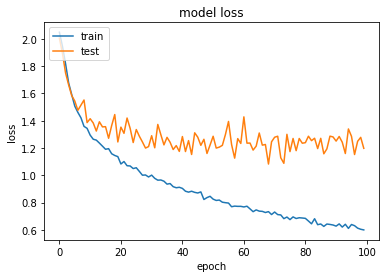

In [177]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
# Save model and weights
model_name = 'Emotion_Model_newcnn.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/avinashchavan/Desktop/finalproject/saved_models/Emotion_Model_newcnn.h5 


In [179]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_newcnn.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 62.05%


In [180]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

635/635 [==============================] - 0s 189us/step


array([6, 0, 4, 4, 6, 6, 5, 3, 2, 0, 6, 0, 3, 6, 0, 6, 7, 1, 2, 6, 6, 0,
       5, 1, 0, 1, 4, 6, 6, 2, 3, 2, 6, 2, 3, 1, 6, 1, 3, 1, 6, 0, 0, 7,
       2, 4, 0, 1, 0, 3, 0, 3, 2, 6, 3, 1, 3, 1, 7, 5, 0, 3, 3, 1, 1, 1,
       1, 4, 4, 2, 4, 1, 6, 6, 3, 7, 7, 0, 6, 1, 7, 7, 6, 0, 3, 4, 4, 1,
       1, 1, 0, 7, 0, 1, 4, 3, 4, 3, 3, 3, 3, 3, 1, 4, 6, 3, 1, 4, 0, 6,
       2, 1, 6, 1, 4, 6, 4, 5, 3, 1, 1, 2, 0, 2, 6, 2, 1, 6, 1, 5, 3, 6,
       2, 4, 6, 0, 6, 5, 6, 4, 3, 5, 1, 0, 4, 0, 0, 7, 4, 0, 4, 2, 2, 3,
       3, 6, 1, 1, 0, 7, 4, 3, 3, 2, 0, 6, 7, 3, 0, 3, 3, 4, 1, 1, 1, 1,
       2, 2, 1, 1, 3, 0, 0, 4, 0, 5, 6, 1, 1, 4, 3, 1, 4, 3, 0, 7, 6, 3,
       3, 2, 4, 0, 7, 4, 6, 6, 1, 0, 7, 1, 5, 6, 6, 7, 1, 0, 6, 1, 6, 3,
       0, 1, 3, 0, 1, 6, 4, 1, 1, 4, 3, 4, 1, 3, 0, 6, 1, 3, 6, 1, 3, 0,
       1, 6, 1, 2, 3, 3, 5, 7, 4, 6, 2, 6, 3, 1, 3, 2, 3, 4, 0, 1, 6, 4,
       6, 3, 4, 4, 4, 1, 4, 2, 1, 0, 0, 6, 3, 1, 7, 1, 3, 5, 7, 1, 2, 3,
       4, 1, 1, 1, 0, 7, 4, 3, 6, 0, 7, 2, 3, 3, 0,

In [181]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,surprise,fear
171,fear,happy
172,calm,calm
173,calm,calm
174,calm,calm
175,calm,calm
176,disgust,disgust
177,fear,disgust
178,calm,calm
179,calm,calm


In [182]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,82
calm,140
disgust,45
fear,111
happy,76
neutral,35
sad,102
surprise,44


In [183]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
#     """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
#     Arguments
#     ---------
#     confusion_matrix: numpy.ndarray
#         The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
#         Similarly constructed ndarrays can also be used.
#     class_names: list
#         An ordered list of class names, in the order they index the given confusion matrix.
#     figsize: tuple
#         A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
#         the second determining the vertical size. Defaults to (10,7).
#     fontsize: int
#         Font size for axes labels. Defaults to 14.
        
#     Returns
#     -------
#     matplotlib.figure.Figure
#         The resulting confusion matrix figure
#     """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.6204724409448819


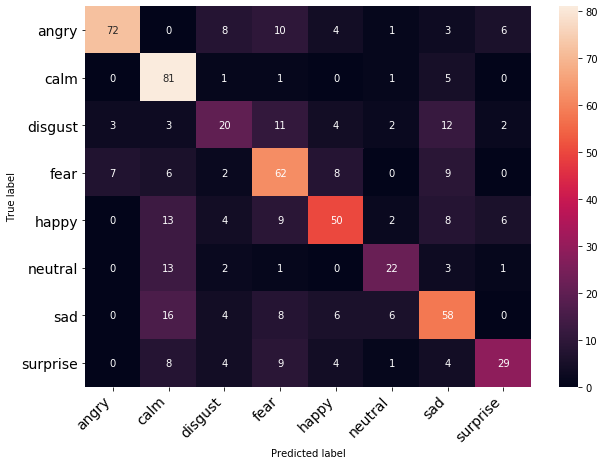

In [184]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [185]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.88      0.69      0.77       104
        calm       0.58      0.91      0.71        89
     disgust       0.44      0.35      0.39        57
        fear       0.56      0.66      0.60        94
       happy       0.66      0.54      0.60        92
     neutral       0.63      0.52      0.57        42
         sad       0.57      0.59      0.58        98
    surprise       0.66      0.49      0.56        59

    accuracy                           0.62       635
   macro avg       0.62      0.60      0.60       635
weighted avg       0.63      0.62      0.62       635



0.7795275590551181


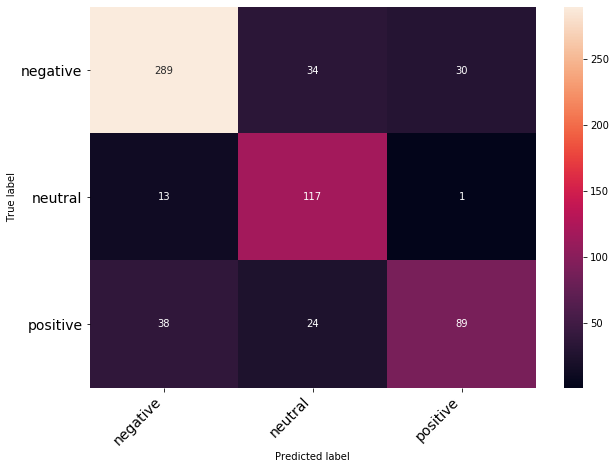

In [186]:

modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'angry':'negative'
                                       , 'disgust':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                        ,'calm':'neutral'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'angry':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'disgust':'negative'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'angry':'negative'
                                       , 'disgust':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       ,'calm':'neutral'                     
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'angry':'negative'
                                       , 'fear':'negative'
                                       , 'happy':'positive'
                                       , 'sad':'negative'
                                       , 'surprise':'positive'
                                       , 'neutral':'neutral'
                                       , 'disgust':'negative'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [187]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

    negative       0.85      0.82      0.83       353
     neutral       0.67      0.89      0.76       131
    positive       0.74      0.59      0.66       151

    accuracy                           0.78       635
   macro avg       0.75      0.77      0.75       635
weighted avg       0.79      0.78      0.78       635

